In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving testA to testA
Saving testB to testB
Saving testC to testC
Saving trainA to trainA
Saving trainB to trainB
Saving trainC to trainC


In [0]:
filePath = ""
filePath += '/Users/sachabozou/Desktop/MVA/Probabilistic_Graphical_Models/'

def readFile(type = 'train' , letter = 'A'):
    f=open( type + letter, "r")
    file = f.read()
    x = []
    y = []
    lines = file.split('\n')
    for i in range (len(lines)-1):
        x1 = lines[i].split(' ')[0]
        x2 = lines[i].split(' ')[1]
        y1 = lines[i].split(' ')[2].strip('"')
        x.append([float(x1),float(x2)])
        y.append(float(y1))
    return np.array(x),np.array(y)

    

## Useful functions to compute and plot

In [0]:
def weightInitialization(n_features):
    w = np.array([0.01]*n_features)
    return w


def sigmoid(x):
    res = 1/(1+np.exp(-x))
    return res


def plot_figure(X,Y):
    K = Y.max() + 1
    for i in range (Y.size):
        col = 'ro'
        if Y[i] == 1:
            col = 'bo'
        plt.plot(X[i, 0], X[i, 1] , col )

    

def plot_boundary(w,X_train,Y_train,X_test,Y_test,dataset) :
    a = np.linspace(np.min(X_train[:,0])-1,np.max(X_train[:,0])+1, np.max(X_train[:,0]) - np.min(X_train[:,0]))
    b = (-w[0]*a-w[2])/w[1]
    plt.figure(figsize=(10,5))
    plt.clf()

    plt.subplot(1,2,1)
    plt.title('dataset : train' + dataset )
    plt.plot(a,b,'green')
    plot_figure(X_train,Y_train)

    plt.subplot(1,2,2)  
    plt.title('dataset : test' + dataset )
    plt.plot(a,b,'green')
    plot_figure(X_test,Y_test)



# Linear classification


## 1. Generative model (LDA)

In [0]:
def LDA_MLE(x,y):
    #number of samples
    n=np.shape(x)[0]
    
    #number of dimensions
    d=np.shape(x)[1]

    #MLE of the parameters
    pi=np.mean(y)
    
    mu_0= (x.T @ (1-y))/np.sum(1-y)
    mu_1= (x.T @ y)/np.sum(y)
    
    sigma=np.zeros((2,2))

    for i in range(n):
        sigma+=(1-y[i])*(x[i,:].reshape(d,1)-mu_0)@((x[i,:].reshape(d,1)-mu_0).T) + y[i]*(x[i,:].reshape(d,1)-mu_1)@((x[i,:].reshape(d,1)-mu_1).T)
        
    sigma=sigma/n
    
    #Computing the parameters of the line for P(y=1|x)
    inv_sigma=np.linalg.pinv(sigma)
    w=inv_sigma@(mu_1-mu_0)

    b=-0.5*(mu_1.T @ inv_sigma @ mu_1 - mu_0.T @ inv_sigma @ mu_0) - np.log((1-pi)/pi)
    
    
    return w,b

def compute_error_MLE(X, W, b , Y): 
  Y_pred = np.where(sigmoid(np.dot(X,W.T) + b )>0.5,1,0)
  error = np.sum(np.abs(Y_pred - Y))/Y.shape[0]
  return error


Parameter learnt for dataset A : w :  0.03 , -0.36     b : 2.62
Error of classification for dataset trainA : 0.00%
Error of classification for dataset testA  : 1.00%


Parameter learnt for dataset B : w :  0.06 , -0.27     b : 1.93
Error of classification for dataset trainB : 2.00%
Error of classification for dataset testB  : 4.00%


Parameter learnt for dataset C : w :  0.04 , -0.33     b : 2.06
Error of classification for dataset trainC : 6.33%
Error of classification for dataset testC  : 7.33%




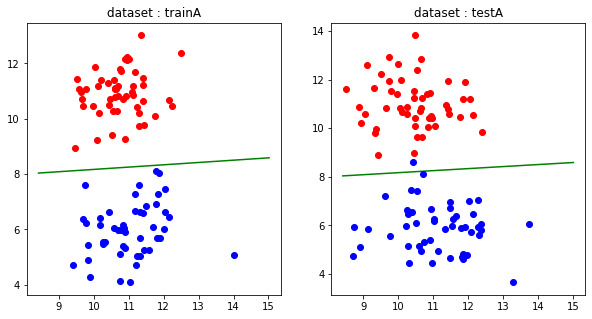

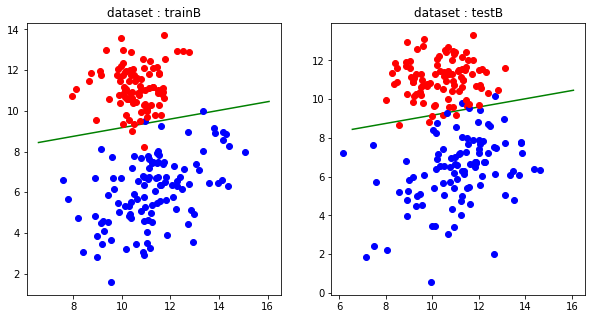

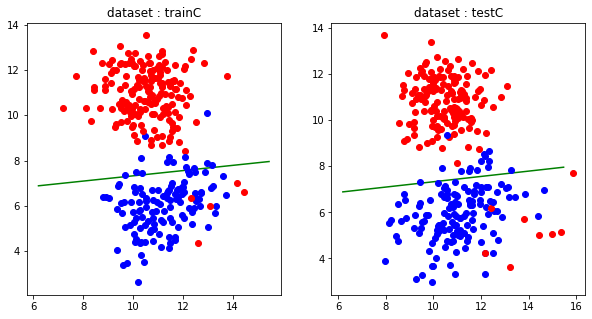

In [0]:
#Computing the parameters for each dataset and plotting the boundary
datasets = ['A','B','C']

for dataset in datasets:
  x_train,y_train = readFile('train',dataset)
  x_test,y_test = readFile('test',dataset)
  w,b = LDA_MLE(x_train,y_train)
  b=np.array([b])
  error_train = compute_error_MLE(x_train, w ,b, y_train)
  error_test = compute_error_MLE(x_test,w,b,y_test)
  print ('Parameter learnt for dataset %s : w :  %1.2f , %1.2f     b : %1.2f' %(dataset,w[0],w[1],b[0]))
  print('Error of classification for dataset train' + dataset + ' : %1.2f%%' %(error_train*100.0))
  print('Error of classification for dataset test' + dataset + '  : %1.2f%%'  %(error_test*100.0))
  print('\n')
  w=np.concatenate((w,b))
  plot_boundary(w,x_train,y_train,x_test,y_test,dataset)

## 2. Logistic Regression

In [0]:
def construct_eta(w,X):
    return (sigmoid(np.dot(X,w)))
            
def construct_D_eta(w,X):
    matrice = np.diagflat(construct_eta(w,X))
    matrice2 = np.eye(matrice.shape[0]) - matrice
    
    return np.dot(matrice,matrice2)


def model_train(X, Y, no_iterations):
    X = np.c_[X, np.ones(X.shape[0]) ]  
    w = weightInitialization(X.shape[1])
    for i in range(no_iterations):
        #weight update
        D = construct_D_eta(w,X)
        t0 = np.dot(D,X)
        t1 = np.linalg.inv(np.dot(X.T,np.dot(D,X)))
        t2 = X.T
        t3= Y - construct_eta(w,X)
        
        
        w = w + np.dot(t1,np.dot(t2,t3))
    
    return w


def compute_error_logistic(X, W , Y):
  X = np.c_[X, np.ones(X.shape[0]) ]  
  Y_pred = np.where(sigmoid(np.dot(X,W.T) )>0.5,1,0)
  error = np.sum(np.abs(Y_pred - Y))/Y.shape[0]
  return error

Parameter learnt for dataset A : w :  14.97 , -59.05     b : 339.41
Error of classification for dataset trainA : 0.00%
Error of classification for dataset testA  : 1.00%


Parameter learnt for dataset B : w :  1.84 , -3.71     b : 13.43
Error of classification for dataset trainB : 1.00%
Error of classification for dataset testB  : 3.50%


Parameter learnt for dataset C : w :  -0.28 , -1.91     b : 18.81
Error of classification for dataset trainC : 3.00%
Error of classification for dataset testC  : 4.67%




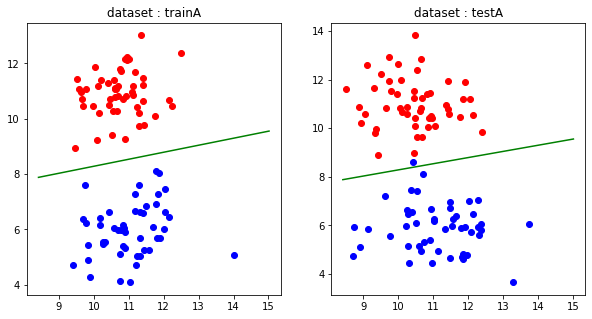

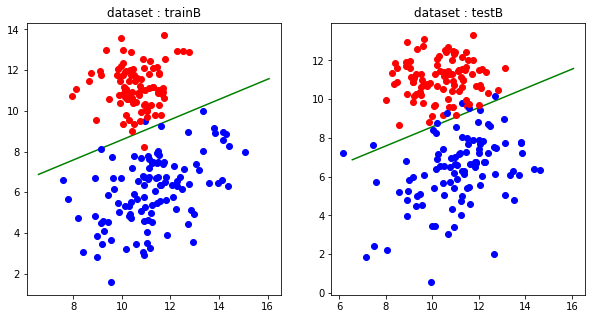

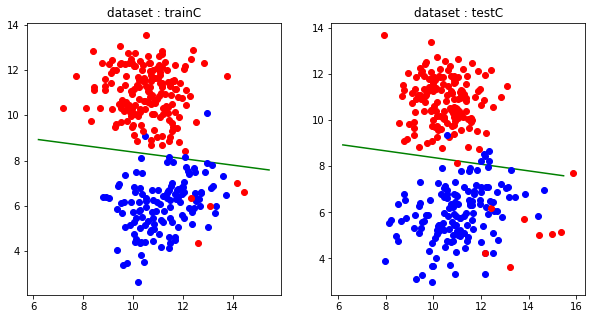

In [0]:
#Computing the parameters for each dataset and plotting the boundary
datasets = ['A','B','C']

for dataset in datasets:
  x_train,y_train = readFile('train',dataset)
  x_test,y_test = readFile('test',dataset)
  w = model_train(x_train,y_train,50)
  error_train = compute_error_logistic(x_train, w , y_train)
  error_test = compute_error_logistic(x_test,w,y_test)
  print ('Parameter learnt for dataset %s : w :  %1.2f , %1.2f     b : %1.2f' %(dataset,w[0],w[1],w[2]))
  print('Error of classification for dataset train' + dataset + ' : %1.2f%%' %(error_train*100.0))
  print('Error of classification for dataset test' + dataset + '  : %1.2f%%'  %(error_test*100.0))
  print('\n')
  plot_boundary(w,x_train,y_train,x_test,y_test,dataset)



## 3. Linear Regression

In [0]:
def linear_reg(x,y):
    #number of samples
    n=np.shape(x)[0]

    #adding a column of 1 to y for the offest reparametrization
    x=np.c_[x, np.ones(x.shape[0]) ]
    
    ## MLE of the parameters
    #solution
    w=np.linalg.inv(x.T@x) @x.T @ y   
    
    #var if the noise
    sigma_2=(1/n)*((y-x@w).T)@(y-x@w)

    return w,sigma_2


def compute_error_linear_reg(X, W, sigma , Y): 
  X=np.c_[X, np.ones(X.shape[0]) ]
  Y_pred = np.where((1/(np.sqrt(2*np.pi*sigma)))*np.exp(-((1- np.dot(X,W.T))**2)/(2*sigma)) >0.5,1,0)
  error = np.sum(np.abs(Y_pred - Y))/Y.shape[0]
  return error

In [0]:
def plot_boundary_linear(w,sigma,X_train,Y_train,X_test,Y_test,dataset) :
    a = np.linspace(np.min(X_train[:,0])-1,np.max(X_train[:,0])+1, np.max(X_train[:,0]) - np.min(X_train[:,0]))

    bias=np.sqrt(sigma*np.log(2/(np.pi*sigma)))-1
    
    b = (-w[0]*a-(w[2]+bias))/w[1]
    plt.figure(figsize=(10,5))
    plt.clf()

    plt.subplot(1,2,1)
    plt.title('dataset : train' + dataset )
    plt.plot(a,b,'green')
    plot_figure(X_train,Y_train)

    plt.subplot(1,2,2)  
    plt.title('dataset : test' + dataset )
    plt.plot(a,b,'green')
    plot_figure(X_test,Y_test)


Parameter learnt for dataset A : w :  0.06 , -0.18     b : 1.38     sigma^2 : 0.03
Error of classification for dataset trainA : 4.00%
Error of classification for dataset testA  : 6.00%


Parameter learnt for dataset B : w :  0.08 , -0.15     b : 0.88     sigma^2 : 0.05
Error of classification for dataset trainB : 7.00%
Error of classification for dataset testB  : 9.50%


Parameter learnt for dataset C : w :  0.02 , -0.16     b : 1.64     sigma^2 : 0.06
Error of classification for dataset trainC : 6.67%
Error of classification for dataset testC  : 7.00%




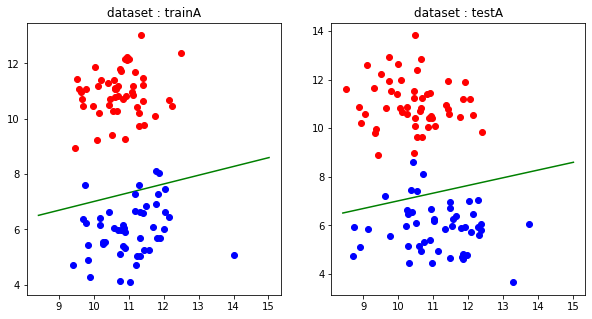

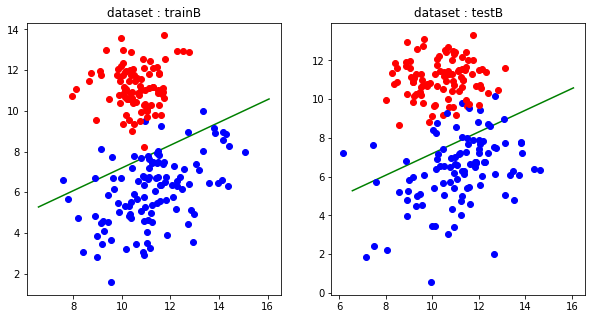

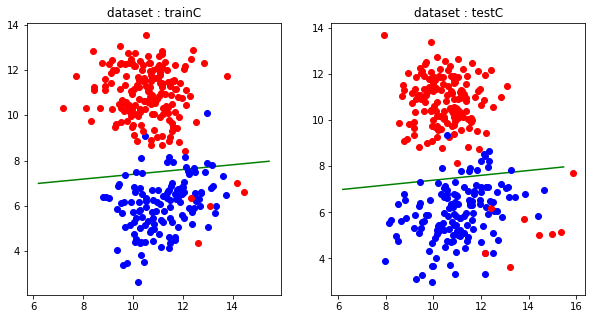

In [42]:
#Computing the parameters for each dataset and plotting the boundary
datasets = ['A','B','C']

for dataset in datasets:
  x_train,y_train = readFile('train',dataset)
  x_test,y_test = readFile('test',dataset)
  w,sigma = linear_reg(x_train,y_train)
  error_train = compute_error_linear_reg(x_train, w,sigma, y_train)
  error_test = compute_error_linear_reg(x_test,w,sigma,y_test)
  print ('Parameter learnt for dataset %s : w :  %1.2f , %1.2f     b : %1.2f     sigma^2 : %1.2f' %(dataset,w[0],w[1],w[2],sigma))
  print('Error of classification for dataset train' + dataset + ' : %1.2f%%' %(error_train*100.0))
  print('Error of classification for dataset test' + dataset + '  : %1.2f%%'  %(error_test*100.0))
  print('\n')
  plot_boundary_linear(w,sigma,x_train,y_train,x_test,y_test,dataset)

## 5. QDA

In [0]:
def QDA_MLE(x,y):
    #number of samples
    n=np.shape(x)[0]
    
    #number of dimensions
    d=np.shape(x)[1]

    #MLE of the parameters
    pi=np.mean(y)
    
    mu_0= (x.T @ (1-y))/np.sum(1-y)
    mu_1= (x.T @ y)/np.sum(y)
    
    sigma_0=np.zeros((2,2))
    sigma_1=np.zeros((2,2))

    for i in range(n):
        sigma_0+=(1-y[i])*(x[i,:].reshape(d,1)-mu_0)@((x[i,:].reshape(d,1)-mu_0).T) 
        sigma_1+=y[i]*(x[i,:].reshape(d,1)-mu_1)@((x[i,:].reshape(d,1)-mu_1).T)
        
    sigma_0=sigma_0/np.sum(1-y)
    sigma_1=sigma_1/np.sum(y)
    
    #Computing the parameters of the line for P(y=1|x)
    inv_sigma_0=np.linalg.pinv(sigma_0)
    inv_sigma_1=np.linalg.pinv(sigma_1)

    w=inv_sigma_1@mu_1- inv_sigma_0@mu_0

    b=-0.5*(mu_1.T @ inv_sigma_1 @ mu_1 - mu_0.T @ inv_sigma_0 @ mu_0) - np.log(((1-pi)*np.sqrt(np.linalg.det(sigma_1)))/(pi*np.sqrt(np.linalg.det(sigma_0))))
    
    K= 0.5 * (inv_sigma_0 - inv_sigma_1)
    
    return w,b,K


def compute_error_QDA_MLE(X, W, b,K , Y): 
  Y_pred = np.where(sigmoid( np.diag(X @ K @ X.T) + np.dot(X,W.T) + b )>0.5,1,0)
  error = np.sum(np.abs(Y_pred - Y))/Y.shape[0]
  return error


def plot_boundary_QDA(W,beta,K,X_train,Y_train,X_test,Y_test,dataset) :
    a = np.linspace(np.min(X_train[:,0])-1,np.max(X_train[:,0])+1, 50)
    b = np.linspace(np.min(X_train[:,1])-1,np.max(X_train[:,1])+1, 50)
    A,B= np.meshgrid(a,b)

    plt.figure(figsize=(10,5))
    plt.clf()

    plt.subplot(1,2,1)
    plt.title('dataset : train' + dataset )
    #Developping the matrix computation
    plt.contour(A,B, K[0,0]*(A**2) + K[1,1]*(B**2)+ (K[0,1]+K[1,0])*(A*B) + W[0]*A + W[1]*B  + beta,0)
    plot_figure(X_train,Y_train)

    plt.subplot(1,2,2)  
    plt.title('dataset : test' + dataset )
    plt.contour(A,B, K[0,0]*(A**2) + K[1,1]*(B**2)+ (K[0,1]+K[1,0])*(A*B) + W[0]*A + W[1]*B  + beta,0)
    plot_figure(X_test,Y_test)


Parameter learnt for dataset A : w :  -9.38 , -5.91     b : 79.95 
K : [[ 0.51010844 -0.07094242]
 [-0.07094242  0.33150233]]
Error of classification for dataset trainA : 0.00%
Error of classification for dataset testA  : 2.00%


Parameter learnt for dataset B : w :  -5.07 , -3.97     b : 46.86 
K : [[ 0.25188603 -0.00996782]
 [-0.00996782  0.18002553]]
Error of classification for dataset trainB : 5.50%
Error of classification for dataset testB  : 7.00%


Parameter learnt for dataset C : w :  -5.07 , -4.01     b : 46.38 
K : [[0.18964116 0.04902811]
 [0.04902811 0.12942362]]
Error of classification for dataset trainC : 14.00%
Error of classification for dataset testC  : 16.67%




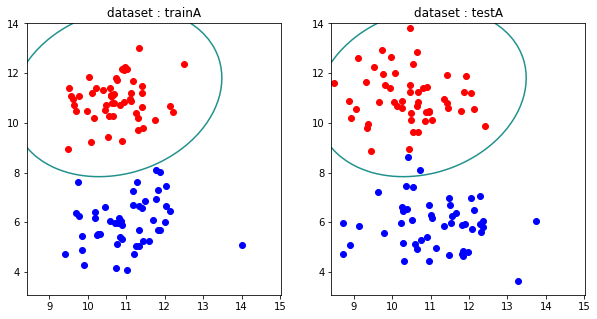

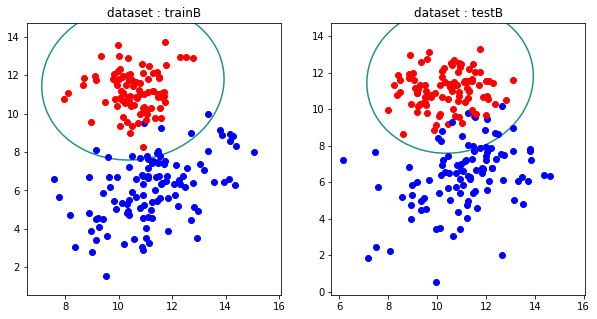

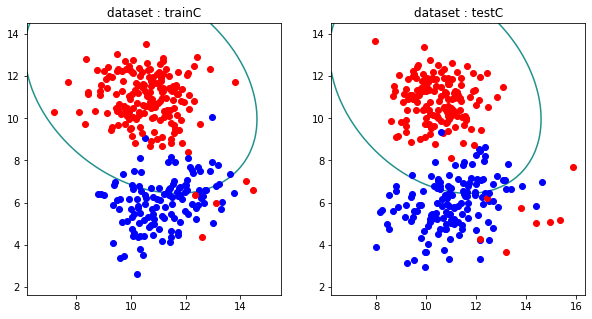

In [58]:
#Computing the parameters for each dataset and plotting the boundary
datasets = ['A','B','C']

for dataset in datasets:
  x_train,y_train = readFile('train',dataset)
  x_test,y_test = readFile('test',dataset)
  w,b,K = QDA_MLE(x_train,y_train)
  b=np.array([b])
  error_train = compute_error_QDA_MLE(x_train, w ,b, K, y_train)
  error_test = compute_error_QDA_MLE(x_test,w,b, K, y_test)
  print ('Parameter learnt for dataset %s : w :  %1.2f , %1.2f     b : %1.2f'  %(dataset,w[0],w[1],b[0]),"\nK :",K)
  print('Error of classification for dataset train' + dataset + ' : %1.2f%%' %(error_train*100.0))
  print('Error of classification for dataset test' + dataset + '  : %1.2f%%'  %(error_test*100.0))
  print('\n')
  w=np.concatenate((w,b))
  plot_boundary_QDA(w,b,K,x_train,y_train,x_test,y_test,dataset)